## 🧠 Unsupervised Learning

**Unsupervised Learning** is a type of Machine Learning where the model is trained using **unlabeled data**.  
It tries to find **hidden patterns or structures** in the input data without any predefined output.

---

### 📌 Key Characteristics:
- No labels or ground truth
- Model discovers patterns on its own
- Often used for data exploration

---

### 📂 Types of Unsupervised Learning

| Type                     | Description                                      | Example Use Case                          |
|--------------------------|--------------------------------------------------|-------------------------------------------|
| **Clustering**           | Group similar data points                        | Customer segmentation in marketing        |
| **Dimensionality Reduction** | Reduce the number of input features            | Image compression, noise reduction        |
| **Anomaly Detection**    | Detect rare/unusual instances                    | Fraud detection in banking                |
| **Association Rules**    | Discover relationships between variables         | Market basket analysis (e.g., Amazon)     |

---

### ✅ Why Use Unsupervised Learning?
- Discover hidden patterns in data
- Useful when labeling is difficult or costly
- Helps with feature engineering and preprocessing

---

### 📊 Common Algorithms:
- K-Means Clustering
- Hierarchical Clustering
- PCA (Principal Component Analysis)
- DBSCAN


## K-Means Clustering

### 📌 What is K-Means?
K-Means is an unsupervised learning algorithm used for clustering. It groups data points into **K distinct non-overlapping clusters** based on similarity.

---

### ⚙️ How it Works:
1. **Choose the number of clusters** `K`.
2. Randomly initialize `K` cluster centroids.
3. Repeat until convergence:
   - **Assign** each point to the nearest centroid.
   - **Update** centroids as the mean of the assigned points.

---

### 🧠 Intuition:
- It tries to minimize **intra-cluster distance** (within a cluster) and maximize **inter-cluster distance** (between clusters).
- Objective function:  
  Minimize the **Sum of Squared Distances (SSD)** between data points and their assigned cluster centroid.

---

### ✅ Pros:
- Simple and fast for large datasets.
- Easy to interpret.

### ❌ Cons:
- Must specify `K` in advance.
- Sensitive to initial centroid placement.
- Struggles with non-spherical clusters or varying cluster sizes.

---

### 📊 Real-life Applications:
- **Customer Segmentation** in marketing.
- **Image Compression** by reducing colors into clusters.
- **Anomaly Detection** in network traffic.
- **Document Clustering** for topic modeling in NLP.
- **Grouping similar products** in recommender systems.

---

### 🔍 How to Choose `K`?
- Use the **Elbow Method**:
  - Plot K vs. Inertia (SSE) and look for the "elbow" point where adding more clusters doesn't reduce the error significantly.


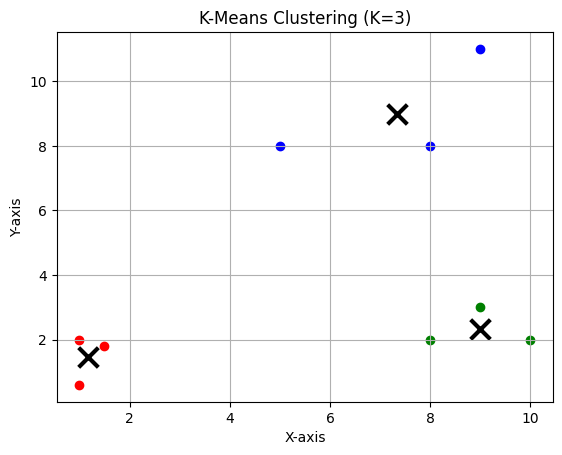

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Sample data (2D points)
X = np.array([
    [1, 2], [1.5, 1.8], [5, 8],
    [8, 8], [1, 0.6], [9, 11],
    [8, 2], [10, 2], [9, 3]
])

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Get cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the results
colors = ["r", "g", "b"]
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color=colors[labels[i]])

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black')
plt.title("K-Means Clustering (K=3)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()


### Dendrogram in Hierarchical Clustering

#### What is Hierarchical Clustering?

- Hierarchical clustering is a technique used to group data points into clusters in a step-by-step manner. It builds a **tree-like structure** showing how individual data points are grouped together over time.
- It doesn't require you to specify the number of clusters (K) in advance.

### Types of Hierarchical Clustering

| Type        | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| Agglomerative (Bottom-Up) | Starts with each point as a single cluster and merges them step by step. (Most common) |
| Divisive (Top-Down)       | Starts with one big cluster and divides it step by step.      |



---

#### What is a Dendrogram?

A **dendrogram** is a tree-like diagram that represents the process of merging clusters in hierarchical clustering.

- Each **leaf** represents a **data point**.
- **Branches** show how close or far data points/clusters are.
- The **height** of the branch represents the **distance (or dissimilarity)** between clusters when they were merged.

---

#### How to Read a Dendrogram:

1. Start from the **bottom** — each point is its own cluster.
2. As you go **up**, similar clusters are **merged** together.
3. The **vertical lines** indicate merging.
4. The **height** of a vertical line tells you **how dissimilar** the two merged clusters were:
   - **Low height** = very similar
   - **High height** = less similar

> ✂️ You can "cut" the dendrogram at a certain height to decide how many clusters you want.

---

#### Real-life Analogy:

Imagine you are organizing a group trip:

- Start by pairing the **most similar** friends.
- Then combine small friend groups into larger ones based on shared interests.
- Continue until everyone is part of one big group.

The **dendrogram** visually shows this merging process.


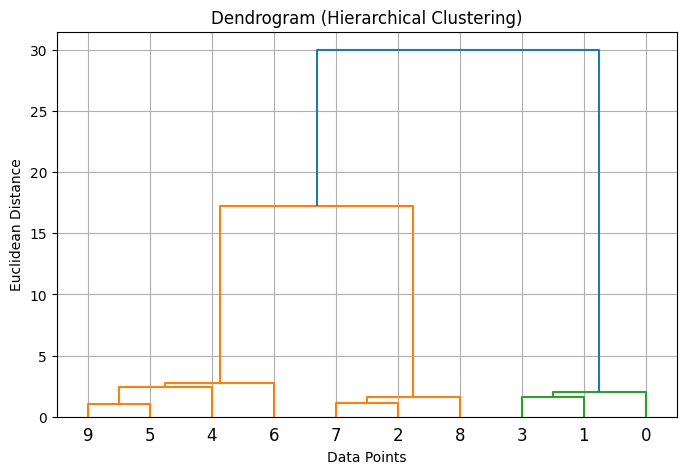

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=10, centers=3, random_state=42)

# Perform hierarchical/agglomerative clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()


## 🧠 Principal Component Analysis (PCA)

### What is PCA?
Principal Component Analysis (PCA) is a **dimensionality reduction** technique used to simplify large datasets by transforming them into fewer dimensions (called **principal components**) while retaining most of the original variance (information).

It helps in:
- Reducing computation time
- Eliminating multicollinearity
- Visualizing high-dimensional data

---

### 📌 Key Concepts

| Term               | Description |
|--------------------|-------------|
| **Variance**        | Spread of data |
| **Principal Components** | New axes that capture the most variance |
| **Eigenvectors**    | Directions of new axes |
| **Eigenvalues**     | Magnitude (importance) of those directions |

---

### ✏️ Role of Eigenvectors and Eigenvalues
- **Eigenvectors** define the new feature directions (principal components).
- **Eigenvalues** tell us how much **variance** each principal component captures.
- The **higher the eigenvalue**, the more important that component is.

---

### 📊 Applications of PCA
- Data Visualization (e.g., plotting 2D version of high-dimensional data)
- Noise Reduction
- Preprocessing before ML algorithms (especially clustering)

---



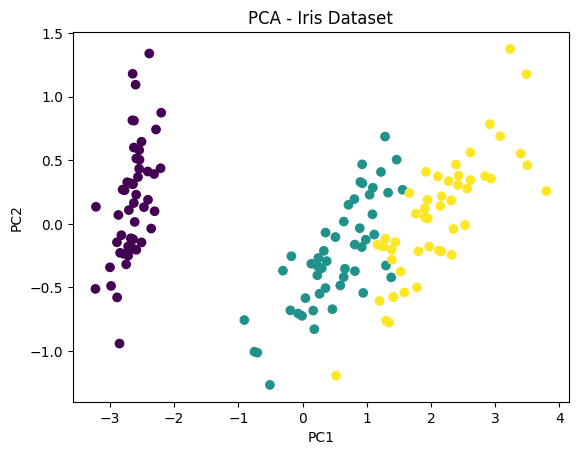

In [4]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
data = load_iris()
X = data.data
y = data.target

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the reduced data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - Iris Dataset")
plt.show()


## 🔍 Anomaly Detection

Anomaly Detection is the process of identifying unusual data points that differ significantly from the majority of the data.

These anomalies may indicate:

- Fraudulent transactions
- Network intrusions
- Machine/system failure
- Health abnormalities

---

### 📊 Types of Anomalies

| Type                 | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| **Point Anomaly**     | A single data point is far from the rest. <br> _Example: ₹10,000 transaction among ₹200 ones_ |
| **Contextual Anomaly**| A data point is anomalous in a specific context. <br> _Example: 35°C temperature in December_ |
| **Collective Anomaly**| A group of related data points is anomalous together. <br> _Example: Sudden spike in network traffic_ |

---

### ⚙️ Techniques for Anomaly Detection

| Technique             | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| **Z-Score Method**      | Detects values far from the mean using standard deviations.                |
| **IQR (Interquartile Range)** | Identifies outliers using percentiles (Q1, Q3).                       |
| **Isolation Forest**    | Tree-based method to isolate anomalies quickly.                            |
| **One-Class SVM**       | Learns the boundary of normal class and flags deviations.                  |
| **Autoencoders**        | Neural networks that reconstruct input; large errors suggest anomalies.    |

---

### 🧠 When to Use

- Datasets with very few labeled anomalies
- Unsupervised scenarios
- Applications where detecting rare events is critical

---


## 📌 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is an unsupervised clustering algorithm that groups closely packed data points and labels isolated points as noise.

### 🔑 Key Terms:
- **Epsilon (ε)**: Radius to find neighboring points.
- **MinPts**: Minimum neighbors required to form a dense region.
- **Core Point**: Has at least MinPts neighbors in ε-radius.
- **Border Point**: Not a core, but near a core point.
- **Noise Point**: Not part of any cluster.

### 🚀 How It Works:
1. For each point, count nearby points within ε.
2. If count ≥ MinPts → Core Point → Start a cluster.
3. Expand cluster by connecting reachable core and border points.
4. Points that don't fit → Noise.

### ✅ Advantages:
- No need to specify number of clusters.
- Detects clusters of arbitrary shape.
- Handles noise/outliers.

### 📌 Real-World Use Cases:
- Anomaly detection (e.g., fraud)
- GPS-based clustering (e.g., city hotspots)
- Customer behavior segmentation


# 🔶 Reinforcement Learning (RL)

Reinforcement Learning is a type of ML where an **agent** learns by interacting with an **environment**, making decisions, and receiving **rewards or penalties**.

---

## 🧩 Key Terms

| Term        | Meaning                                  |
|-------------|-------------------------------------------|
| Agent       | The learner or decision maker            |
| Environment | The world the agent interacts with       |
| Action      | The move taken by the agent              |
| State       | The current situation                    |
| Reward      | Feedback (+ve/-ve) for an action         |
| Policy (π)  | Strategy for choosing actions            |
| Value       | Expected future reward from a state      |

---

## 🎯 Goal
To learn a **policy** that maximizes **cumulative rewards** over time.

---

## 🔁 Process
1. Agent observes the **state**
2. Takes an **action**
3. Receives a **reward**
4. Moves to a **new state**
5. Repeats and learns

---

## 🧠 Examples
- Game-playing (e.g., AlphaGo, Chess)
- Robotics (e.g., robot learning to walk)
- Self-driving cars

---

## ⭐ Popular Algorithms
- Q-Learning
- Deep Q-Network (DQN)
- SARSA
- PPO (Proximal Policy Optimization)

